In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

channels = [
  {'name':"alpha", 'columns':slice(16, 25, 1)},
  {'name':"beta", 'columns':slice(17, 26, 1)},
]
buffer = np.zeros((4, len(channels) + 1),)
i = 0
def mean(row):
  return row.mean(axis=0)
func = mean

In [17]:
row1 = np.array([
  15.093,16.585,17.877,18.292,18.667,15.536,17.226,15.359,13.659,10.647,11.716,12.832,10.273,10.187,12.236,12.543,9.692,6.498,8.167,7.983,7.934,8.196,8.496,6.969,9.109,7.928,9.288,8.964,10.002,10.749,10.301,8.172,6.281,5.929,5.055,7.771,5.108,6.570,5.933,6.486,7.116,6.691,6.377,8.424,5.625,7.402,7.411,7.200,5.898,7.038,7.856,7.273,9.968,10.594,10.013,7.855,16.829,11.762,7.992,9.314,6.142,7.031,8.312,16.858,13.732,9.046,7.277,7.261,8.219,6.863,0
])
# row1 = np.ones(71,)

data = [ func(row1[ch['columns']]) for ch in channels ] + [row1[-1]]
aggregated_row = np.array(data)
aggregated_row.shape

buffer[i] = aggregated_row
i = (i+1) % 4

In [18]:
buffer, i

(array([[8.116, 7.92 , 0.   ],
        [0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   ]]),
 1)

In [19]:
buffer_get = np.vstack((buffer[i:], buffer[:i]))
buffer_get[:, 0] = buffer_get[:, 0] + 1
buffer_get

array([[1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [9.116, 7.92 , 0.   ]])

[1.5, 1.5] [0, 1]
<a list of 4 Line2D objects>


[]

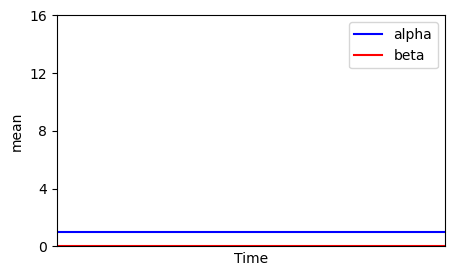

In [36]:
figure = plt.figure(figsize=(5, 3))
ax = figure.add_subplot(111)
# plot = ax.plot(buffer_get, label=[ch['name'] for ch in channels])

# ax.legend([ch['name'] for ch in channels])
X_LABELS = ["t-3", "t-2", "t-1", "t"]
ax.set_xticks(range(4))
ax.set_xticklabels(X_LABELS)
ax.set_xlabel("Time")
ax.set_ylabel(func.__name__)
Y_LABELS = range(0, 20, 4)  
ax.set_yticks(Y_LABELS)
ax.set_yticklabels(Y_LABELS)

i = 50


sin_arr =  np.sin(np.linspace(0, 2 * np.pi, i))
cos_arr =  np.cos(np.linspace(0, 2 * np.pi, i))

sin_arr = np.concatenate([sin_arr for i in range(100)])
cos_arr = np.concatenate([cos_arr for i in range(100)])

plota = Line2D([], [])
plota.set_label("alpha")
plota.set_color('blue')

plotb = Line2D([], [])
plotb.set_label("beta")
plotb.set_color('red')
ax.add_line(plota)
ax.add_line(plotb)


plota.set_data(range(len(buffer_get)), buffer_get[:, 0])


plotb.set_data(range(len(buffer_get)), buffer_get[:, 1])
# ax.axvline(x=1.5, color='black', linestyle='--') 
markers_lines = [plt.axvline(x=1.5, color='black', linestyle='--')]

prev_x, prev_y = markers_lines[0].get_data()
print(prev_x, prev_y)

ax.add_line(markers_lines[0])
markers_lines[0].set_data([1, 1], prev_y)

print(ax.get_lines())

ax.legend()
# set different colors to the lines
ax.plot()

In [21]:
import numpy as np
arr2d = np.array([[1.312, 2.312, 1.0], [4.3211, 5.3211, 0.0], [6.3211, 7.3211, 2.0]])
arr2d.shape
arr2d[:, -1]

markers = arr2d[:, -1]

# np.where(markers == 1.0)
non_zero = np.nonzero(markers)[0]
non_zero[1], markers[non_zero[1]]

(2, 2.0)

[1.5, 1.5] [0, 1]
Line2D(_child2) Line2D(_child2)
([<matplotlib.lines.Line2D object at 0x7532bf09efd0>, <matplotlib.lines.Line2D object at 0x7532bf118110>], ['alpha', 'beta'])
<a list of 3 Line2D objects>
list [<matplotlib.lines.Line2D object at 0x7532beddf910>]


[]

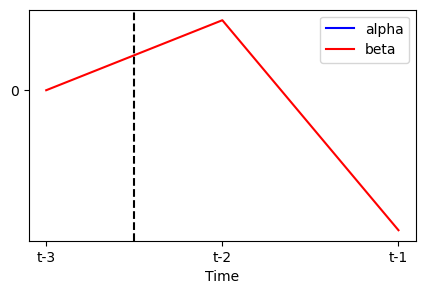

In [113]:
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
figure = plt.figure(figsize=(5, 3))
ax = figure.add_subplot(111)
# plot = ax.plot(buffer_get, label=[ch['name'] for ch in channels])

# ax.legend([ch['name'] for ch in channels])
X_LABELS = ["t-3", "t-2", "t-1", "t"]
ax.set_xticks(range(4))
ax.set_xticklabels(X_LABELS)
ax.set_xlabel("Time")
Y_LABELS = range(-1, 2, 1)  
ax.set_yticks(Y_LABELS)
ax.set_yticklabels(Y_LABELS)

i = 50


sin_arr =  np.sin(np.linspace(0, 2 * np.pi, i))
cos_arr =  np.cos(np.linspace(0, 2 * np.pi, i))

sin_arr = np.concatenate([sin_arr for i in range(100)])
cos_arr = np.concatenate([cos_arr for i in range(100)])

plota = Line2D([], [])
plota.set_label("alpha")
plota.set_color('blue')

plotb = Line2D(range(3), list(np.sin(np.linspace(0, 2 * np.pi, 3))))
plotb.set_label("beta")
plotb.set_color('red')
ax.add_line(plota)
ax.add_line(plotb)



# plota.set_data(range(len(sin_arr)), sin_arr)
# plotb.set_data(range(len(cos_arr)), cos_arr)
markers_lines = [ax.axvline(x=1.5, color='black', linestyle='--')]

prev_x, prev_y = markers_lines[0].get_data()
print(prev_x, prev_y)

markers_lines[0].set_data([0.5, 0.5], prev_y)

# ax.lines.remove(markers_lines[0])
print(markers_lines[0], ax.lines[-1])
# l = markers_lines.pop()
# l.remove()

# ax.axvline(x=1.5, color='black', visible=False, label='test')
# p1 = mpatches.Patch(color='black', ls='-', label='test', lw=0.1)
print(ax.get_legend_handles_labels())
# ax.lines.remove()
print(ax.get_lines())

print('list', markers_lines)
ax.legend()
# for artist in ax.get_legend_handles_labels()[0]:
#   print(artist)
#   ps.append(artist)
# ax.legend(handles=ps,)

ax.annotate('--- kill', color='black', xy=(10, 10), xycoords='axes points',
            size=10,
            )
ax.annotate('--- boredoml', color='green', xy=(10, 20),
            size=10,
            )
# set different colors to the lines
ax.plot()

([<matplotlib.lines.Line2D object at 0x7532e80e4610>], ['beta'])


[]

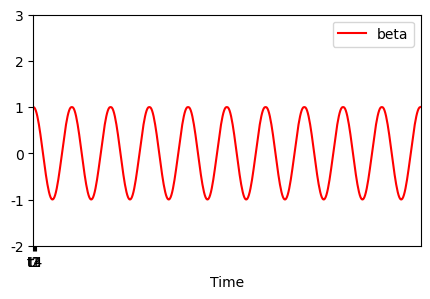

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

i = 50

sin_arr =  np.sin(np.linspace(0, 2 * np.pi, i))
cos_arr =  np.cos(np.linspace(0, 2 * np.pi, i))

sin_arr = np.concatenate([sin_arr for i in range(10)])
cos_arr = np.concatenate([cos_arr for i in range(10)])


figure = plt.figure(figsize=(5, 3))
ax = figure.add_subplot(111)

ax.set_xlabel("Time")
ax.set_xlim(0, len(cos_arr))
ax.set_xticks(range(4), labels=['t1', 't2', 't3', 't4'])
Y_LABELS = range(-2, 4, 1)  
ax.set_yticks(Y_LABELS)
ax.set_yticklabels(Y_LABELS)


plotb = Line2D([], [])

plotb.set_label("beta")
plotb.set_color('red')

ax.add_line(plotb)


plotb.set_data(range(len(cos_arr)), cos_arr)

# ax.axvline(x=1.5, color='black', linestyle='--') 
ax.legend()
ax.plot()

In [24]:
list(range(-1, 2, 1) )

[-1, 0, 1]

In [25]:
from typing import Iterable
def calculate_xticks(frequency: int, size: int, labels_num: int = 4) -> dict[str,Iterable]:
  diff = size // (frequency * labels_num)
  labels = [f'-{i*diff}s' for i in range(labels_num-1, 0, -1)] + ['Now']
  ticks = range(diff * frequency, size, diff * frequency)
  return {'labels': labels, 'ticks': ticks}

calculate_xticks(10, 100, 4)

{'labels': ['-6s', '-4s', '-2s', 'Now'], 'ticks': range(20, 100, 20)}